<a href="https://colab.research.google.com/github/LeeJaeEun0/st230113/blob/main/230113_05_DL_07_1_%EC%9E%8E%EC%82%AC%EA%B7%80_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()
# kaggle > Profile 이미지 > Account > Account > API > Create New API Token
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
# late submission
# https://www.kaggle.com/competitions/plant-pathology-2020-fgvc7
!kaggle competitions download -c plant-pathology-2020-fgvc7 # kaggle.json? -> 403, late submission -> 401

Saving kaggle.json to kaggle.json
 99% 774M/779M [00:05<00:00, 148MB/s]
100% 779M/779M [00:05<00:00, 141MB/s]


In [ ]:
!ls
!unzip plant-pathology-2020-fgvc7

plant-pathology-2020-fgvc7.zip	sample_data
Archive:  plant-pathology-2020-fgvc7.zip
  inflating: images/Test_0.jpg       
  inflating: images/Test_1.jpg       
  inflating: images/Test_10.jpg      
  inflating: images/Test_100.jpg     
  inflating: images/Test_1000.jpg    
  inflating: images/Test_1001.jpg    
  inflating: images/Test_1002.jpg    
  inflating: images/Test_1003.jpg    
  inflating: images/Test_1004.jpg    
  inflating: images/Test_1005.jpg    
  inflating: images/Test_1006.jpg    
  inflating: images/Test_1007.jpg    
  inflating: images/Test_1008.jpg    
  inflating: images/Test_1009.jpg    
  inflating: images/Test_101.jpg     
  inflating: images/Test_1010.jpg    
  inflating: images/Test_1011.jpg    
  inflating: images/Test_1012.jpg    
  inflating: images/Test_1013.jpg    
  inflating: images/Test_1014.jpg    
  inflating: images/Test_1015.jpg    
  inflating: images/Test_1016.jpg    
  inflating: images/Test_1017.jpg    
  inflating: images/Test_1018.jpg    
  in

In [ ]:
!ls

images				sample_data	       test.csv
plant-pathology-2020-fgvc7.zip	sample_submission.csv  train.csv


In [ ]:
import pandas as pd

# train = pd.read_csv('train.csv')
# test = pd.read_csv('test.csv')
# submission = pd.read('submission.csv')

# 데이터 경로
data_path = './'
train = pd.read_csv(data_path+'train.csv')
test = pd.read_csv(data_path +'test.csv')
submission = pd.read_csv(data_path + 'sample_submission.csv')


In [ ]:
train.shape, test.shape

((1821, 5), (1821, 1))

In [ ]:
train.head()
# image_id : 확장자 없음 => dataset 만들 때 추가
# healthy multiple_diseases rus scab -> 0,1 -> 원핫 인코딩

,image_id,healthy,multiple_diseases,rust,scab
0,Train_0,0,0,0,1
1,Train_1,0,1,0,0
2,Train_2,1,0,0,0
3,Train_3,0,0,1,0
4,Train_4,1,0,0,0


In [ ]:
test.head()

,image_id
0,Test_0
1,Test_1
2,Test_2
3,Test_3
4,Test_4


In [ ]:
submission.head()

,image_id,healthy,multiple_diseases,rust,scab
0,Test_0,0.25,0.25,0.25,0.25
1,Test_1,0.25,0.25,0.25,0.25
2,Test_2,0.25,0.25,0.25,0.25
3,Test_3,0.25,0.25,0.25,0.25
4,Test_4,0.25,0.25,0.25,0.25


## 타깃값 분포

In [ ]:
# 데이터를 타깃값별로 추출
healthy = train.loc[train['healthy']==1]
multiple_diseases = train.loc[train['multiple_diseases']==1]
rust = train.loc[train['rust']==1]
scab = train.loc[train['scab']==1]

In [ ]:
train.columns.tolist()[1:]

['healthy', 'multiple_diseases', 'rust', 'scab']

([<matplotlib.patches.Wedge at 0x7f7868bf2670>,
 [Text(0.6921787180836257, 0.8549202431993926, 'healthy'),
  Text(-0.3942932497177081, 1.0269044908008969, 'multiple_diseases'),
  Text(-1.0996317038245758, -0.028462535794632142, 'rust'),
  Text(0.5744651016901711, -0.9380777403499678, 'scab')],
 [Text(0.377552028045614, 0.4663201326542141, '28.3'),
  Text(-0.21506904530056806, 0.5601297222550347, '5.0'),
  Text(-0.5997991111770412, -0.015525019524344801, '34.2'),
  Text(0.31334460092191146, -0.5116787674636187, '32.5')])

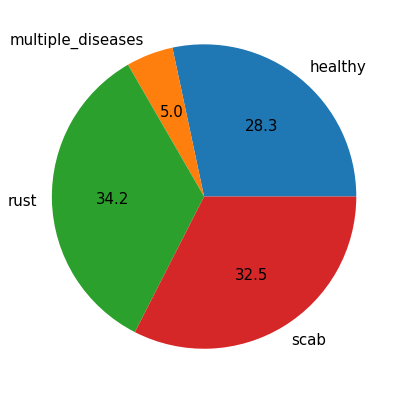

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('font', size=15)
plt.figure(figsize=(7,7))

# label = train.columns.tolist()[1:]
label = ['healthy', 'multiple_diseases', 'rust', 'scab']
# 타깃값 분포 파이 그래프
plt.pie(
    [len(healthy), len(multiple_diseases),len(rust), len(scab)],
    labels = label,
    autopct = '%.1f' # 소수점 1째자리까지
)

## 이미지 출력

In [ ]:
import matplotlib.gridspec as gridspec # 서브플롯 자동으로 배치
import cv2 # 이미지 불러오기

def show_image(img_ids, rows=2, cols=3):
    assert len(img_ids) <= rows * cols # 이미지가 행/열 개수보다 많으면 오류 발생
    # assert는 True면은 문제가 없고, False일 때 에러를 발생시킴

    plt.figure(figsize=(15, 8)) # 전체 이미지 사이즈 설정
    grid = gridspec.GridSpec(rows, cols) # 서브플롯 배치
    # 이미지 출력
    for idx, img_id in enumerate(img_ids):
        img_path = f'images/{img_id}.jpg' # 이미지 파일 경로
        image = cv2.imread(img_path) # 이미지 파일 읽기
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # 이미지 색상 보정
        ax = plt.subplot(grid[idx]) # gridspec -> 서브플롯
        ax.imshow(image) # 이미지 출력
    
    plt.show()

In [ ]:
# 각 타깃별 이미지 ID 6개 -> 출력
num_of_lmgs = 6
last_imgs = lambda x:x['image_id'][-num_of_lmgs:] # 뒤에서 num_of_lmgs 만큼의 갯수만큼 이미지 id 추출

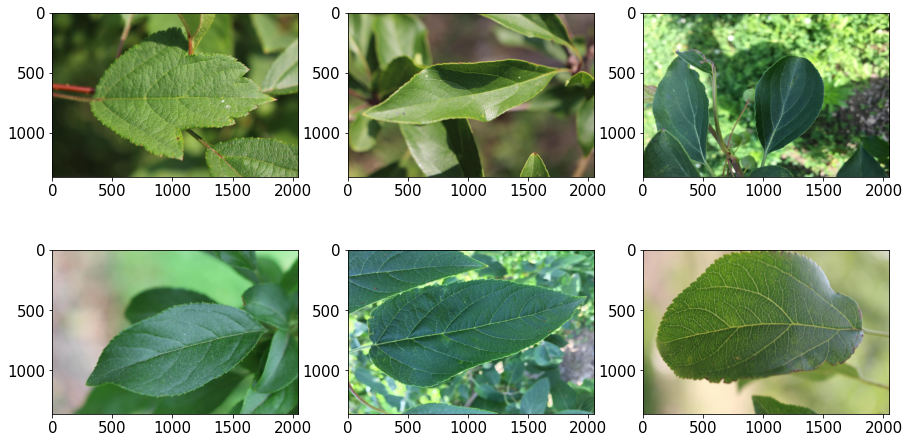

In [ ]:
show_image(last_imgs(healthy)) # 건강한 잎사귀

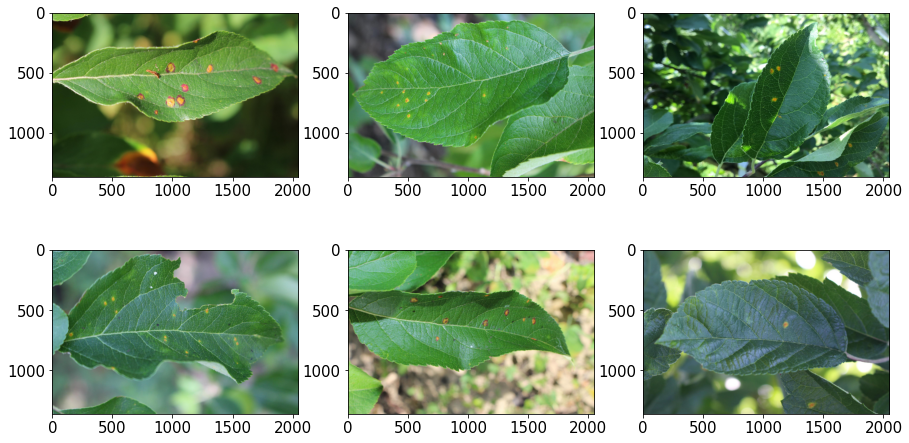

In [ ]:
show_image(last_imgs(rust) )# 녹병에 걸린 잎사귀